**Table of contents**<a id='toc0_'></a>    
- [Set Model Version](#toc1_1_)    
      - [Check NAN](#toc1_1_1_1_)    
      - [Assign Target and Split](#toc1_1_1_2_)    
      - [Split](#toc1_1_1_3_)    
    - [Preprocessing](#toc1_1_2_)    
    - [Function Additions](#toc1_1_3_)    
- [Run Vanilla Decision Tree](#toc2_)    
    - [Run Vanilla Models](#toc2_1_1_)    
    - [Model 1: XGBoost](#toc2_1_2_)    
    - [Extra Trees](#toc2_1_3_)    
      - [Best Model](#toc2_1_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
!pip install graphviz

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mtick
import sqlite3
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from bs4 import BeautifulSoup
import time
import graphviz
import requests     
import shutil       
import datetime
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
import requests
import json
import xgboost
from xgboost import XGBClassifier
from random import randint
import  random
import os
os.chdir('C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2')
from cmath import nan
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import make_column_selector as selector, ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.metrics import fbeta_score
import winsound
from sklearn.linear_model import LinearRegression
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, f1_score, make_scorer, recall_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import pprint
import pickle
import winsound
from cmath import nan
import plotly
import plotly.express as px
from plotly import graph_objects as go
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import pydot
from IPython.display import Image, display
from sklearn.tree import DecisionTreeClassifier, export_graphviz, _tree



# Sound Variables
sound_file = "data/audio/Jobs Done.wav"

def play_jobs_done():
    winsound.PlaySound(sound_file, winsound.SND_FILENAME)


bad_sound_file = 'data/audio/Danger Will Robinson.wav'

def play_danger():
    winsound.PlaySound(bad_sound_file, winsound.SND_FILENAME)



## <a id='toc1_1_'></a>[Set Model Version](#toc0_)

If you want to run BRAND NEW Models, set a new model version, which will create a new folder and save the models to. 

In [3]:
modeling_version = 'v4'

home_folder = 'C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2/'

model_folder = home_folder + '/models/' + modeling_version + '/'
print(model_folder)

C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2//models/v4/


In [4]:
if not os.path.exists(model_folder):
    print('Creating Folder')
    os.makedirs(model_folder)

Creating Folder


In [5]:
# load data 
df  = pd.read_csv('data/final/aggregates/Double_Fights_DF_V16.csv') 
df.head(3)

,Unnamed: 0,Fighter_A,Fighter_B,A_Kd,B_Kd,A_Sig_strike_land,A_Sig_strike_att,B_Sig_strike_land,B_Sig_strike_att,A_Sig_strike_percent,...,B_Martial_Art_Year_Started_2,A_Martial_Art_3,B_Martial_Art_3,A_Martial_Art_Instructor_3,B_Martial_Art_Instructor_3,A_Martial_Art_Year_Started_3,B_Martial_Art_Year_Started_3,A_Style,B_Style,Style_Matchup
0,0,Holly Holm,Irene Aldana,0,0,154,301,69,185,0.51,...,2009.0,Muay Thai,Brazilian Jiu-Jitsu,Mike Winkeljohn,Instructor: Gustavo Dantas,2001.0,2012.0,Boxing,Boxing,Boxing vs Boxing
1,1,Greg Hardy,Ben Sosoli,0,0,54,105,26,97,0.51,...,2012.0,Boxing,Boxing,Din Thomas,John Wayne Parr,2012.0,2013.0,Wrestling,Boxing,Wrestling vs Boxing
2,2,Jared Rosholt,Josh Copeland,0,0,22,45,9,36,0.48,...,2013.0,Brazilian Jiu-Jitsu,Brazilian Jiu-Jitsu,Professor Jason Tooke,Carlos Gracie Jr.,2007.0,2016.0,Wrestling,Brazilian Jiu-Jitsu,Wrestling vs Brazilian Jiu-Jitsu


In [6]:
unnamed = [n for n in df.columns if 'Unnamed' in n]
df.drop(columns=unnamed, inplace=True)
#Identify columns with missing values
nothere = df.isna().sum()
nothere = pd.DataFrame(nothere)
nothere = nothere.loc[nothere[0] > 0]
nothere

,0
A_topdown_Avg_Kd_per_round,883
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
A_Martial_Art_Year_Started_3,50
B_Martial_Art_Year_Started_3,50
A_Style,30
B_Style,30


In [7]:
# get cols with InFightData in the name
InFightData = [n for n in df.columns if 'InFightData' in n]
InFightData


['InFightData__Method_Primary',
 'InFightData__Method_Detail',
 'InFightData__Round',
 'InFightData__Time',
 'InFightData__General_Method',
 'InFightData__Total_Fight_Time_Seconds']

In [8]:
# drop them from df
df.drop(columns=InFightData, inplace=True)

In [9]:
to_drop= ['A_Kd', 'B_Kd', 'A_Sig_strike_land',
       'A_Sig_strike_att', 'B_Sig_strike_land', 'B_Sig_strike_att',
       'A_Sig_strike_percent', 'B_Sig_strike_percent', 'A_Total_Strikes_land',
       'A_Total_Strikes_att', 'B_Total_Strikes_land', 'B_Total_Strikes_att',
       'A_Total_Strikes_percent', 'B_Total_Strikes_percent',
       'A_Takedowns_land', 'A_Takedowns_att', 'B_Takedowns_land',
       'B_Takedowns_att', 'A_Takedown_percent', 'B_Takedown_percent',
       'A_Sub_Attempts_land', 'A_Sub_Attempts_att', 'B_Sub_Attempts_land',
       'B_Sub_Attempts_att', 'A_Rev', 'B_Rev', 'A_Ctrl_time_min',
       'A_Ctrl_time_sec', 'B_Ctrl_time_min', 'B_Ctrl_time_sec',
       'A_Ctrl_time_tot', 'B_Ctrl_time_tot', 'details','A_Head_Strikes_land',
       'A_Head_Strikes_att', 'B_Head_Strikes_land', 'B_Head_Strikes_att',
       'A_Head_Strikes_percent', 'B_Head_Strikes_percent',
       'A_Body_Strikes_land', 'A_Body_Strikes_att', 'B_Body_Strikes_land',
       'B_Body_Strikes_att', 'B_Body_Strikes_percent', 'A_Leg_Strikes_land', 'A_Leg_Strikes_att',
       'B_Leg_Strikes_land', 'B_Leg_Strikes_att', 'A_Leg_Strikes_percent',
       'B_Leg_Strikes_percent', 'A_Distance_Strikes_land',
       'A_Distance_Strikes_att', 'B_Distance_Strikes_land',
       'B_Distance_Strikes_att', 'A_Distance_Strikes_percent',
       'B_Distance_Strikes_percent', 'A_Clinch_Strikes_land',
       'A_Clinch_Strikes_att', 'B_Clinch_Strikes_land', 'B_Clinch_Strikes_att',
       'A_Clinch_Strikes_percent', 'B_Clinch_Strikes_percent',
       'A_Ground_Strikes_land', 'A_Ground_Strikes_att',
       'B_Ground_Strikes_land', 'B_Ground_Strikes_att',
       'A_Ground_Strikes_percent', 'B_Ground_Strikes_percent',  'A_Body_Strikes_percent']

df.drop(columns=to_drop, inplace=True)

In [10]:
# drop all Dif Rows
dif_rows = ['Dif_Kd', 'Dif_Sig_strike_land', 'Dif_Sig_strike_att', 'Dif_Sig_strike_percent',
 'Dif_Total_Strikes_land', 'Dif_Total_Strikes_att', 'Dif_Total_Strikes_percent', 'Dif_Takedowns_land',
 'Dif_Takedowns_att', 'Dif_Takedown_percent', 'Dif_Sub_Attempts_land', 'Dif_Sub_Attempts_att',
 'Dif_Rev', 'Dif_Ctrl_time_min', 'Dif_Ctrl_time_sec', 'Dif_Ctrl_time_tot', 'Dif_Head_Strikes_land',
 'Dif_Head_Strikes_att', 'Dif_Head_Strikes_percent', 'Dif_Body_Strikes_land', 'Dif_Body_Strikes_att',
 'Dif_Body_Strikes_percent', 'Dif_Leg_Strikes_land', 'Dif_Leg_Strikes_att', 'Dif_Leg_Strikes_percent',
 'Dif_Distance_Strikes_land', 'Dif_Distance_Strikes_att', 'Dif_Distance_Strikes_percent', 'Dif_Clinch_Strikes_land',
 'Dif_Clinch_Strikes_att', 'Dif_Clinch_Strikes_percent', 'Dif_Ground_Strikes_land','Dif_Ground_Strikes_att',
 'Dif_Ground_Strikes_percent']

df.drop(columns=dif_rows, inplace=True)

In [11]:
# drop instructor columns
instructor_cols = [col for col in  df.columns if 'Instructor' in col]

df.drop(columns=instructor_cols, inplace=True)

#### <a id='toc1_1_1_1_'></a>[Check NAN](#toc0_)

In [12]:
# Check NAN
missing = df.isna().sum()
missing = pd.DataFrame(missing)
missing = missing.loc[missing[0] > 0]
missing

,0
A_topdown_Avg_Kd_per_round,883
A_topdown_Avg_Sig_strike_land_per_round,14
A_topdown_Avg_Sig_strike_att_per_round,2
A_topdown_Avg_Total_Strikes_land_per_round,8
A_topdown_Avg_Total_Strikes_att_per_round,2
...,...
A_Martial_Art_Year_Started_3,50
B_Martial_Art_Year_Started_3,50
A_Style,30
B_Style,30


In [13]:
# replace NAN with 0
df.fillna(0, inplace=True)

In [14]:
# replace and INF with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [15]:
all_cols = df.columns.to_list()

In [16]:
# find weightclass columns
weightclass = [n for n in all_cols if 'Weightclass' in n]
weightclass

['A_Typical_Weightclass',
 'B_Typical_Weightclass',
 'A_Fight_in_Typical_Weightclass',
 'B_Fight_in_Typical_Weightclass']

In [17]:
# check Winner column
df['Winner'].value_counts()

Jim Miller          46
Charles Oliveira    38
Donald Cerrone      38
Jon Jones           36
Dustin Poirier      34
                    ..
Jimmy Flick          2
Dustin Kimura        2
Kevin Aguilar        2
Marcin Held          2
Royston Wee          2
Name: Winner, Length: 1159, dtype: int64

In [18]:
#df.drop(columns=in_fight_cols, inplace=True)
#df.drop(columns=in_fight_difs, inplace=True)
colz = list(df.columns)
# get favorite
#df['favorite?'] = np.where(df['Fighter_A_Odds_obf'] < 0, 1, 0)

In [19]:
# check value counts
df['win?'].value_counts()

1    4171
0    4171
Name: win?, dtype: int64

In [20]:
fav_check = df.groupby('favorite?')['win?'].value_counts()
fav_check

favorite?  win?
0          0       2766
           1       1478
1          1       2693
           0       1405
Name: win?, dtype: int64

In [21]:
# Check how often winner is favorite
fav = df.loc[df['favorite?'] == 1]
fav['win?'].value_counts()

1    2693
0    1405
Name: win?, dtype: int64

#### <a id='toc1_1_1_2_'></a>[Assign Target and Split](#toc0_)

In [22]:
target_name = "win?"
y = df[target_name]
X = df.drop(columns=[target_name])

# drop columns you dont want to use
to_drop = ['event_title','event_url','date', 'fight_id', 'Fighter_A', 'Fighter_B', 'datetime', 'date_formatted',
            'Winner', 'event_code', 'A_Typical_Weightclass', 'B_Typical_Weightclass', 'final_round_seconds' ]  # sometimes 'event_id' needed
X = X.drop(columns=to_drop)

# Scoring Metric
class_metric = 'accuracy'

In [23]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(X)
categorical_columns = categorical_columns_selector(X)

categorical_columns

['fight_weightclass',
 'A_Martial_Art_1',
 'B_Martial_Art_1',
 'A_Martial_Art_2',
 'B_Martial_Art_2',
 'A_Martial_Art_3',
 'B_Martial_Art_3',
 'A_Style',
 'B_Style',
 'Style_Matchup']

In [24]:
# make sure categorical_columns are all strings
for col in categorical_columns:
    X[col] = X[col].astype(str)


In [25]:
numerical_columns.remove('favorite?')
categorical_columns.append('favorite?')

In [26]:
col_list = X.columns.to_list()

#### <a id='toc1_1_1_3_'></a>[Split](#toc0_)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [28]:
catcols = []

for col in categorical_columns:
    ind = col_list.index(col)
    catcols.append(ind)

catcols

[478, 679, 680, 683, 684, 687, 688, 691, 692, 693, 487]

In [29]:
cont_cols_index = [n for n in range(len(X_train.columns)) if n not in catcols]

In [30]:
# To get the column names from onehotencoder
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', max_categories=None)
checker = ohe.fit_transform(X_train[categorical_columns])

# Use get_feature_names_out instead of get_feature_names
feature_names_categorical = ohe.get_feature_names_out(input_features=categorical_columns)

### <a id='toc1_1_2_'></a>[Preprocessing](#toc0_)

In [31]:
# pipeline for categorical data
cat_preprocessing = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)
# pipeline for numerical data
num_preprocessing = make_pipeline(StandardScaler())

# combine both pipeline using a columnTransformer
preprocessing = ColumnTransformer(
    [("num", num_preprocessing, cont_cols_index), ("cat", cat_preprocessing, catcols)]
)

preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                  14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                  25, 26, 27, 28, 29, ...]),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 [478, 679, 680, 683, 684, 687, 688, 691, 692,
                                  693, 487])])

### <a id='toc1_1_3_'></a>[Function Additions](#toc0_)

In [32]:
def save_result(cv_mean_accuracy, cv_std_accuracy, model_name):
    # Define function to save training result

    # Access global variable model_summary2
    global model_summary2 

    # Create a new row with model name, mean accuracy and standard deviation accuracy
    row = [(model_name, cv_mean_accuracy, cv_std_accuracy)]

    # Create a new dataframe with the row data and column names
    dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
    res = pd.DataFrame(columns = dfcols2, data = row)

    # Concatenate the existing model summary dataframe and the new result dataframe
    yeep = [model_summary2, res]
    model_summary2 = pd.concat(yeep)

    # Sort the dataframe by mean accuracy in descending order and drop any duplicates
    model_summary2 = model_summary2.sort_values('Cv_Mean_Accuracy', ascending = False)
    model_summary2 = model_summary2.drop_duplicates()

    # Return the updated model summary dataframe rounded to 3 decimal places
    return model_summary2.round(3)

In [33]:
def run_model(model, model_name):
    """
    # This function runs a machine learning model, produces a confusion matrix, and saves the result
    # It takes two parameters: the machine learning model and its name

    """

    # Fits the model with the training data
    model.fit(X_train, y_train)

    # Obtains the model's predictions using the test data
    model_prediction = model.predict(X_test)

    # Generates a confusion matrix to evaluate the model's performance
    cf_matrix = confusion_matrix(y_test, model_prediction)

    # Saves the confusion matrix with the model's name
    save_result(cf_matrix, model_name)

    # Creates a visualization of the confusion matrix for easy interpretation
    cf = make_confusion_matrix(cf_matrix)

    # Returns a summary of the model's performance
    return model_summary

In [34]:
dfcols2 = ['Model_Name', 'Cv_Mean_Accuracy', 'Cv_Std_Accuracy']
# Create a dataframe to store the model summary
model_summary2 = pd.DataFrame(columns=dfcols2)

In [35]:
def create_fullpipe(preprocessing, model, model_name):
    fullpipe = Pipeline(steps=[('preprocess', preprocessing), ('model', model)])
    fullpipe.fit(X_train, y_train)
    # cross validation
    cv = cross_val_score(fullpipe, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(fullpipe, open(model_folder + f'{model_name}.pkl', 'wb'))
    return res

In [36]:
# Function cross validates a model and saves the result and a pickle file
def score_and_save(model, model_name):
    # Cross validate model scores
    cv = cross_val_score(model, X_test, y_test, cv=3, scoring='accuracy')
    cv_mean = cv.mean()
    cv_std = cv.std()
    # save result
    res = save_result(cv_mean, cv_std, model_name)
    # pickle model
    pickle.dump(model, open(model_folder + model_name +'.pkl', 'wb'))
    # make confusion matrix
    return res

In [37]:
def gridsearch_results(grid_clf, param_name,
                          num_results=5,
                          graph=True,
                          display_all_params=False,
                          ):
    """
    Visualizes the results of a grid search performed using scikit-learn's GridSearchCV.
    Used to perform sensitivity analysis of hyperparameters.

    Parameters:
    - grid_clf: GridSearchCV object (fitted)
    - param_name: str, the name of the hyperparameter to be plotted
    - num_results: int, number of top results to display in tabular form (default: 15)
    - graph: bool, whether to display a plot (default: True)
    - display_all_params: bool, whether to display all hyperparameters of the best estimator (default: True)
    """
    
    if not isinstance(grid_clf, GridSearchCV):
        raise ValueError("grid_clf must be an instance of GridSearchCV.")
    
    if not hasattr(grid_clf, 'cv_results_'):
        raise ValueError("GridSearchCV object must be fitted with data.")
    
    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    if param_name not in grid_clf.param_grid:
        raise ValueError(f"{param_name} not found in hyperparameters used in the grid search.")

    print(f"best parameters: {clf_params}")
    print(f"best score:      {clf_score:0.5f} (+/-{clf_stdev:0.5f})")
    
    if display_all_params:
        pprint.pprint(clf.get_params())

    # pick out the best results
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    new_param = 'param_' + param_name
    cv_results[new_param] = pd.Series(cv_results[new_param]).replace({np.log2(np.e): 'log2', np.sqrt(np.e): 'sqrt'})

    best_row = scores_df.iloc[0, :]
    best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row[new_param]

    # display the top 'num_results' results
    top_results =pd.DataFrame(cv_results).sort_values(by='rank_test_score').head(num_results)

    # PLOT
    # Convert the hyperparameter values to strings
    scores_df[new_param] = scores_df[new_param].astype(str)
    scores_df = scores_df.sort_values(by=new_param)

    means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df[new_param]

    # Get the index of the best hyperparameter value
    best_param = str(best_param)  # Ensure best_param is a string for comparison
    best_param_index = scores_df[new_param].eq(best_param).idxmax()


    # plot
    if graph:
        fig, ax = plt.subplots(figsize=(8, 4))
        try:
            ax.errorbar(range(len(params)), means, yerr=stds)  # Use index instead of actual values
            ax.set_xticks(range(len(params)))  # Set x-axis labels to the hyperparameter values
            ax.set_xticklabels(params, rotation=45, ha='right')  # every other x-tick
            
            ax.axhline(y=best_mean + best_stdev, color='red')
            ax.axhline(y=best_mean - best_stdev, color='red')
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            # make y-axis ticks every 5 ticks
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))
            plt.show()
        except TypeError:
            ax.plot(best_param_index, best_mean, 'or')  # Use the index of the best_param
            ax.set_title(f"{param_name} vs Score\nBest Score {clf_score:0.5f}")
            ax.set_xlabel(param_name)
            ax.set_ylabel('Score')
            plt.show()

    return top_results, fig

# <a id='toc2_'></a>[Run Vanilla Decision Tree](#toc0_)
Decion trees are good places to start when building a simple model to improve on. We might be able to learn something from it. 

### <a id='toc2_1_1_'></a>[Run Vanilla Models](#toc0_)

In [38]:
create_fullpipe(preprocessing, LogisticRegression(), 'Logistic_Regression')
create_fullpipe(preprocessing, RandomForestClassifier(), 'Random_Forest')
create_fullpipe(preprocessing, DecisionTreeClassifier(), 'Decision_Tree')
create_fullpipe(preprocessing, BaggingClassifier(), 'Bagged_Trees')
create_fullpipe(preprocessing, ExtraTreesClassifier(), 'Extra_Trees')
create_fullpipe(preprocessing, KNeighborsClassifier(), 'K_Neighbors')
create_fullpipe(preprocessing, XGBClassifier(eval_metric = 'logloss'), 'XGBoost')

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest,0.698,0.010
0,XGBoost,0.690,0.002
0,Extra_Trees,0.686,0.006
0,Logistic_Regression,0.672,0.006
0,Bagged_Trees,0.647,0.012
0,Decision_Tree,0.595,0.015
0,K_Neighbors,0.589,0.011


Simple Decision Tree

First I want to see a simple decision tree, optimized with GridSearchCV.

In [39]:
# load decision tree classifier from pickle
decision_tree = pickle.load(open(model_folder+'Decision_Tree.pkl', 'rb'))

# check if Decision Tree Grid Search already exists
if os.path.exists(model_folder + 'Decision_Tree_Gridsearched.pkl'):
    # print the path + exists
    print(model_folder + 'Decision_Tree_Gridsearched.pkl exists')
    # load decision tree grid search from pickle
    decision_tree = pickle.load(open(model_folder + 'Decision_Tree_Gridsearched.pkl', 'rb'))
    # run through test and save
    final_decision_tree =score_and_save(decision_tree, 'Decision_Tree_Gridsearched')
    best_pipeline = decision_tree
    print(final_decision_tree)


else:
    # print the path + does not exist
    print(model_folder + 'Decision_Tree_Gridsearched.pkl does not exist')
    # Create a dictionary of hyperparameters to search
    param_grid = {
        "model__max_depth": [ 1, 2, 3, 4],
        "model__min_samples_split": [.01, .05, .1,],
        "model__min_samples_leaf": [.01, .05, .1],
        "model__criterion": ["gini" ],
        "model__max_features": [None, "auto", "sqrt", "log2"],
    }

    # Create a gridsearch of the decision tree, using 3-fold cross validation,
    # search across the specified hyperparameters
    # Use all available cores
    grid_search = GridSearchCV(
        decision_tree, param_grid, cv=3, scoring="accuracy", verbose=3
    )

    # Fit the gridsearch to the training data
    grid_search.fit(X_train, y_train)

    # Print the best parameters and best score found by the gridsearch
    print(grid_search.best_params_)

    # get the whole gridsearch results
    gs_results = grid_search.cv_results_
    gs_results_df = pd.DataFrame(grid_search.cv_results_)
    gs_results_df.head()
    best_estimator = grid_search.best_estimator_
    best_pipeline = best_estimator

    final_decision_tree = score_and_save(best_estimator, 'Decision_Tree_Gridsearched')
    print(final_decision_tree)


C:/Users/travis/OneDrive/Data Science/Personal_Projects/Sports/UFC_Prediction_V2//models/v4/Decision_Tree_Gridsearched.pkl does not exist
Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV 1/3] END model__criterion=gini, model__max_depth=1, model__max_features=None, model__min_samples_leaf=0.01, model__min_samples_split=0.01;, score=0.670 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth=1, model__max_features=None, model__min_samples_leaf=0.01, model__min_samples_split=0.01;, score=0.659 total time=   0.2s
[CV 3/3] END model__criterion=gini, model__max_depth=1, model__max_features=None, model__min_samples_leaf=0.01, model__min_samples_split=0.01;, score=0.662 total time=   0.2s
[CV 1/3] END model__criterion=gini, model__max_depth=1, model__max_features=None, model__min_samples_leaf=0.01, model__min_samples_split=0.05;, score=0.670 total time=   0.2s
[CV 2/3] END model__criterion=gini, model__max_depth=1, model__max_features=None, model__min_sample

In [40]:

# Access the decision tree model from the pipeline
decision_tree_model = best_pipeline.named_steps['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))  # Convert class names to strings

# Visualize the decision tree with proper labels
plt.figure(figsize=(15, 10), dpi=1000)
plot_tree(decision_tree_model, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

Visualize with Graphviz

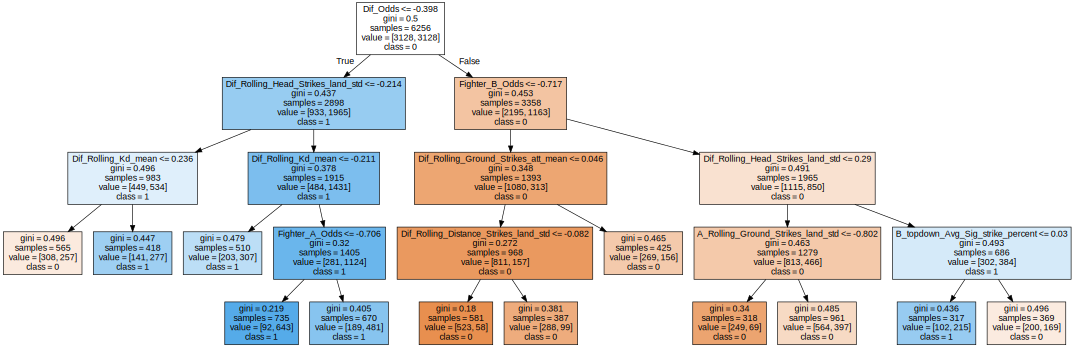

In [41]:

# Access the decision tree model from the pipeline
decision_tree_model = best_pipeline.named_steps['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))

# Export the decision tree to Graphviz format
dot_data = export_graphviz(decision_tree_model, feature_names=feature_names,
                           class_names=class_names, filled=True)

# Add size attribute to the dot_data string (width, height) in inches
dot_data = dot_data.replace("digraph Tree {", 'digraph Tree { size="15,10";')

graph = graphviz.Source(dot_data)
graph

In [42]:

# Access the decision tree model from the pipeline
decision_tree_model = best_pipeline.named_steps['model']

# Get the numerical column names
numerical_feature_names = numerical_columns

# Get the one-hot-encoded categorical column names
categorical_feature_names = feature_names_categorical

# Combine numerical and one-hot-encoded categorical column names
feature_names = numerical_feature_names + list(categorical_feature_names)

# Get the unique class names (sorted) and convert them to strings
class_names = sorted(y.unique().astype(str))

def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        # This is a leaf node, get the predicted class
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        # Construct the explanation for the leaf node
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        # This is an internal node, get the feature and threshold for the decision rule
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        # Construct the explanation for the decision rule
        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')
        # Recur on the left subtree (True branch)
        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
        # Update the explanation for the right branch
        explanation[-1] = explanation[-1].replace('<=', '>')
        # Recur on the right subtree (False branch)
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
        return f'{left_explanation}\n\nOtherwise, {right_explanation}'
    

# Use the recursive function to generate the explanation
explanation = explain_tree(decision_tree_model, feature_names, class_names)
print(explanation)

If the Dif_Odds <= -0.40,
and if the Dif_Rolling_Head_Strikes_land_std <= -0.21,
and if the Dif_Rolling_Kd_mean <= 0.24,
Then this observation is classified as "0".

Otherwise, If the Dif_Odds <= -0.40,
and if the Dif_Rolling_Head_Strikes_land_std <= -0.21,
and if the Dif_Rolling_Kd_mean > 0.24,
Then this observation is classified as "1".

Otherwise, If the Dif_Odds <= -0.40,
and if the Dif_Rolling_Head_Strikes_land_std > -0.21,
and if the Dif_Rolling_Kd_mean <= -0.21,
Then this observation is classified as "1".

Otherwise, If the Dif_Odds <= -0.40,
and if the Dif_Rolling_Head_Strikes_land_std > -0.21,
and if the Dif_Rolling_Kd_mean > -0.21,
and if the Fighter_A_Odds <= -0.71,
Then this observation is classified as "1".

Otherwise, If the Dif_Odds <= -0.40,
and if the Dif_Rolling_Head_Strikes_land_std > -0.21,
and if the Dif_Rolling_Kd_mean > -0.21,
and if the Fighter_A_Odds > -0.71,
Then this observation is classified as "1".

Otherwise, If the Dif_Odds > -0.40,
and if the Fighter_B_O

In [43]:
def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    samples = decision_tree.tree_.n_node_samples[node]
    values = decision_tree.tree_.value[node][0]
    value_proportions = values / sum(values)
    gini_impurity = decision_tree.tree_.impurity[node]

    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return '\n'.join(explanation)
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]

        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')

        explanation.append(f'This node has {samples} samples, with class proportions: {", ".join([f"{class_names[i]}: {value_proportions[i]:.2f}" for i in range(len(values))])}.')
        explanation.append(f'The Gini impurity for this node is {gini_impurity:.2f}.')

        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())

        explanation[-3] = explanation[-3].replace('<=', '>')
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())

        return f'{left_explanation}\n\nOtherwise, {right_explanation}'

explanation = explain_tree(decision_tree_model, feature_names, class_names)
print(explanation)


If the Dif_Odds <= -0.40,
This node has 6256 samples, with class proportions: 0: 0.50, 1: 0.50.
The Gini impurity for this node is 0.50.
and if the Dif_Rolling_Head_Strikes_land_std <= -0.21,
This node has 2898 samples, with class proportions: 0: 0.32, 1: 0.68.
The Gini impurity for this node is 0.44.
and if the Dif_Rolling_Kd_mean <= 0.24,
This node has 983 samples, with class proportions: 0: 0.46, 1: 0.54.
The Gini impurity for this node is 0.50.
Then this observation is classified as "0".

Otherwise, If the Dif_Odds <= -0.40,
This node has 6256 samples, with class proportions: 0: 0.50, 1: 0.50.
The Gini impurity for this node is 0.50.
and if the Dif_Rolling_Head_Strikes_land_std <= -0.21,
This node has 2898 samples, with class proportions: 0: 0.32, 1: 0.68.
The Gini impurity for this node is 0.44.
and if the Dif_Rolling_Kd_mean > 0.24,
This node has 983 samples, with class proportions: 0: 0.46, 1: 0.54.
The Gini impurity for this node is 0.50.
Then this observation is classified as 

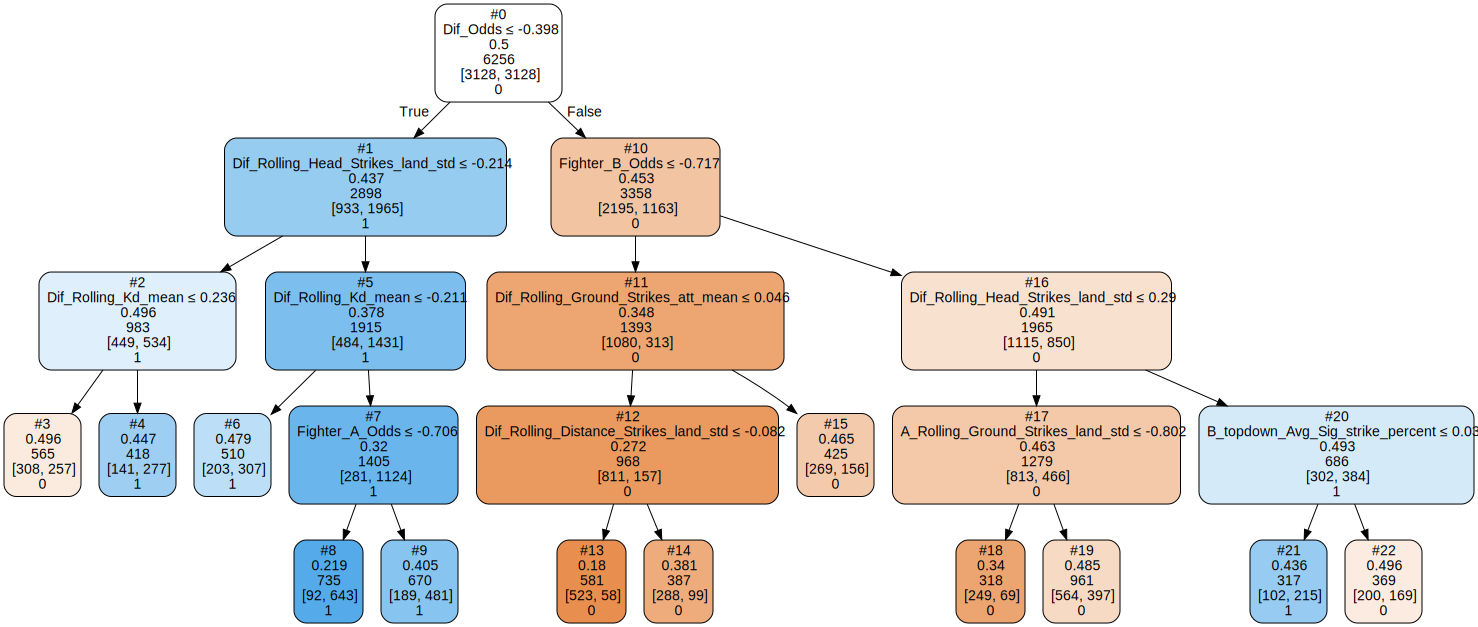

In [44]:
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

def explain_tree(decision_tree, feature_names, class_names, node=0, depth=0, explanation=[]):
    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation.append(f'Then this observation is classified as "{class_name}".')
        return explanation
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        if depth == 0:
            explanation.append(f'If the {feature} <= {threshold:.2f},')
        else:
            explanation.append(f'and if the {feature} <= {threshold:.2f},')
        left_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_left[node], depth+1, explanation.copy())
        explanation[-1] = explanation[-1].replace('<=', '>')
        right_explanation = explain_tree(decision_tree, feature_names, class_names, decision_tree.tree_.children_right[node], depth+1, explanation.copy())
        return left_explanation + right_explanation

node_explanations = explain_tree(decision_tree_model, feature_names, class_names)

def my_node_label(node):
    return node_explanations[node]

dot_data = export_graphviz(decision_tree_model, out_file=None, feature_names=feature_names, class_names=class_names, filled=True, rounded=True, special_characters=True, node_ids=True, label=my_node_label)
graph = graphviz.Source(dot_data)
display(graph)



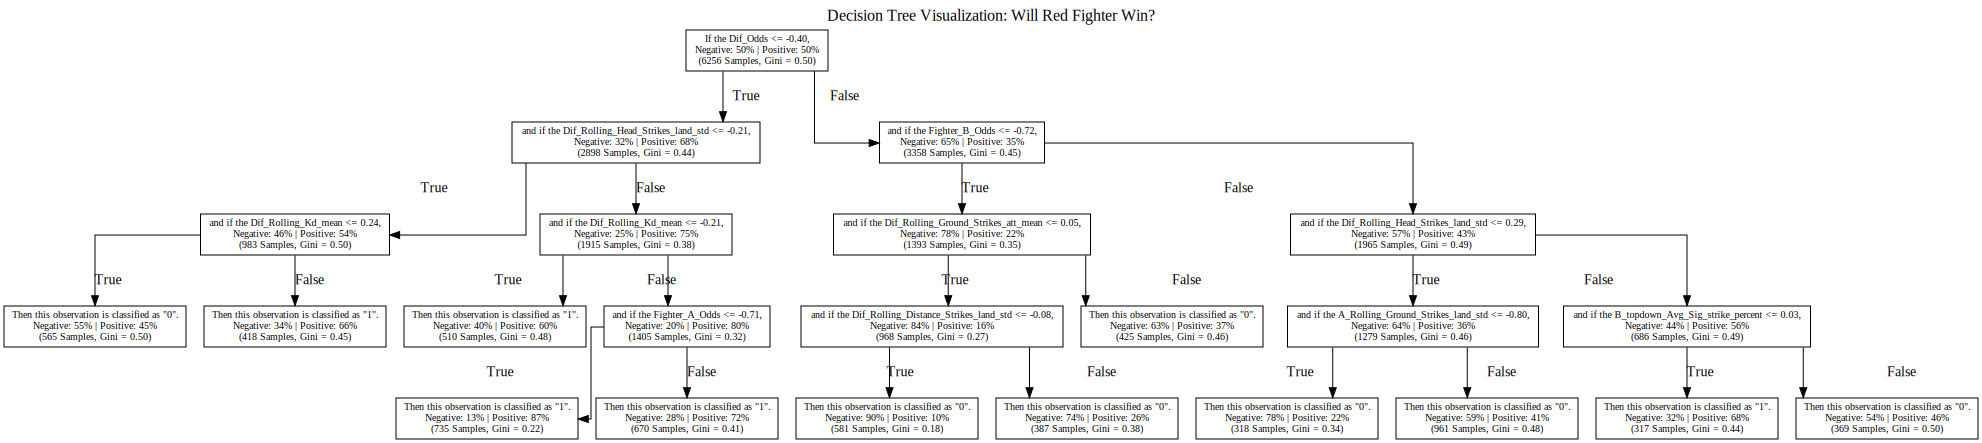

In [45]:
import graphviz
from sklearn.tree import _tree

def build_graph(decision_tree, feature_names, class_names, title, label_0='No', label_1='Yes', node=0, depth=0, parent=None, branch=None):
    samples = decision_tree.tree_.n_node_samples[node]
    values = decision_tree.tree_.value[node][0]
    value_proportions = values / sum(values)
    gini_impurity = decision_tree.tree_.impurity[node]

    if decision_tree.tree_.children_left[node] == _tree.TREE_LEAF:
        class_index = decision_tree.tree_.value[node].argmax()
        class_name = class_names[class_index]
        explanation = f'Then this observation is classified as "{class_name}".'
    else:
        feature = feature_names[decision_tree.tree_.feature[node]]
        threshold = decision_tree.tree_.threshold[node]
        explanation = f'If the {feature} <= {threshold:.2f},' if depth == 0 else f'and if the {feature} <= {threshold:.2f},'

    explanation += (f'\n{label_0}: {value_proportions[0]*100:.0f}% | {label_1}: {value_proportions[1]*100:.0f}%'
                    f'\n({samples} Samples, Gini = {gini_impurity:.2f})')
    graph.node(str(node), label=explanation, shape='rectangle', fontsize='10')

    if parent is not None:
        graph.edge(str(parent), str(node), label=branch)

    if decision_tree.tree_.children_left[node] != _tree.TREE_LEAF:
        build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_left[node], depth+1, node, "True")
        build_graph(decision_tree, feature_names, class_names, title, label_0, label_1, decision_tree.tree_.children_right[node], depth+1, node, "False")

# Create a new Graphviz graph
graph = graphviz.Digraph(format='png', graph_attr={'splines': 'ortho', 'ranksep': '0.5'})

# Specify custom labels for class 0 and class 1
custom_label_0 = 'Negative'
custom_label_1 = 'Positive'

# Specify the title for the graph
graph_title = 'Decision Tree Visualization: Will Red Fighter Win?'

# Set the title for the graph
graph.attr(label=graph_title, labelloc='t', fontsize='16')

# Call the build_graph function to construct the graph recursively
build_graph(decision_tree_model, feature_names, class_names, graph_title, custom_label_0, custom_label_1)

# Display the graph once it has been fully constructed
display(graph)

In [46]:
# load random forest model from pickle

with open(model_folder + 'Random_Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)

Random Forest Sequential GridSearch

In [47]:

def random_forest_sequential_gridsearch(model, X, y):

    # Define the grid of hyperparameters
    param_grids = [
        {'n_estimators': [100],
         'max_depth': [None] + list(range(2, 101, 7)),
         'max_features': ['auto', 'sqrt'],
         'criterion': ['gini'],
         'min_samples_split': list(range(2, 8)),
         'min_samples_leaf': list(range(1, 8)),
         'bootstrap': [True],
         'max_leaf_nodes': [None] + list(range(2, 6)),
         'min_impurity_decrease': [x / 10 for x in range(4)],
         'n_jobs':[16]}
    ]

    best_params = {}

    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # if the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'Random_Forest_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'Random_Forest_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, f'Random_Forest_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:

            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {'model__' + k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X_train, y_train)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'Random_Forest_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_['model__' + param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1
        

    return best_estimator, best_params


In [48]:
# run the gridsearch
best_estimator, best_params = random_forest_sequential_gridsearch(rf_model, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'Random_Forest_Sequential_Gridsearch')
final_gridsearched_model

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END ...........model__n_estimators=100;, score=0.729 total time=   4.7s
[CV 2/4] END ...........model__n_estimators=100;, score=0.715 total time=   4.7s
[CV 3/4] END ...........model__n_estimators=100;, score=0.718 total time=   4.6s
[CV 4/4] END ...........model__n_estimators=100;, score=0.706 total time=   4.7s
Best n_estimators: 100
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END model__max_depth=None, model__n_estimators=100;, score=0.713 total time=   4.8s
[CV 2/4] END model__max_depth=None, model__n_estimators=100;, score=0.706 total time=   4.7s
[CV 3/4] END model__max_depth=None, model__n_estimators=100;, score=0.715 total time=   4.7s
[CV 4/4] END model__max_depth=None, model__n_estimators=100;, score=0.698 total time=   4.8s
[CV 1/4] END model__max_depth=2, model__n_estimators=100;, score=0.707 total time=   0.9s
[CV 2/4] END model__max_depth=2, model__n_estimators=100;, score=0.700 

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,Random_Forest_Sequential_Gridsearch_part_5,0.706,0.006
0,Random_Forest_Sequential_Gridsearch_part_6,0.703,0.008
0,Random_Forest_Sequential_Gridsearch_part_7,0.698,0.007
0,Random_Forest_Sequential_Gridsearch_part_8,0.698,0.006
0,Random_Forest,0.698,0.010
0,Random_Forest_Sequential_Gridsearch_part_2,0.697,0.008
0,Random_Forest_Sequential_Gridsearch_part_3,0.696,0.009
0,Random_Forest_Sequential_Gridsearch_part_9,0.695,0.010
0,Random_Forest_Sequential_Gridsearch_part_0,0.694,0.004
0,XGBoost,0.690,0.002


In [49]:
# check if the model exists already in models folder
def check_model(model_name):
    if os.path.isfile(model_folder + model_name +'.pkl'):
        print('Model already exists')
        return True
    else:
        return False


if check_model('Random_Forest_1000') == False:
    create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=1000), 'Random_Forest_1000')
else:
    # load model from pickle
    with open(model_folder + 'Random_Forest_1000.pkl', 'rb') as f:
        rf_1000_model = pickle.load(f)
    # test it
    score_and_save(rf_1000_model, 'Random_Forest_1000')

if check_model('Random_Forest_500') == False:
    create_fullpipe(preprocessing, RandomForestClassifier(n_estimators=500), 'Random_Forest_500')
    # load model from pickle
    with open(model_folder + 'Random_Forest_500.pkl', 'rb') as f:
        rf_500_model = pickle.load(f)
    # test it
    score_and_save(rf_500_model, 'Random_Forest_500')



In [50]:
# load random forest model from pickle

with open(model_folder + 'Random_Forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)


### <a id='toc2_1_2_'></a>[Model 1: XGBoost](#toc0_)

In [51]:
xg_boost = pickle.load(open(model_folder + 'XGBoost.pkl', 'rb'))
keys = xg_boost.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
xg_boost[1].get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)>

In [52]:

def xgboost_sequential_gridsearch(model, X, y):

    # Define the grid of hyperparameters
    param_grids = [
        {'model__n_estimators': [100],
         'model__max_depth': list(range(2, 50, 4)),
         'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
         'model__min_child_weight': list(range(1, 8)),
         'model__gamma': [0, 0.1, 0.2, 0.3],
         'model__subsample': [0.6, 0.8, 1.0],
         'model__colsample_bytree': [0.6, 0.8, 1.0]}
    ]

    best_params = {}

    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():

        # If the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'XGBoost_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'XGBoost_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, 'XGBoost_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:
            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X, y)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'XGBoost_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_[param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1

    return best_estimator, best_params


In [53]:
# run the gridsearch
best_estimator, best_params = xgboost_sequential_gridsearch(xg_boost, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'XGBoost_Sequential_Gridsearch')
final_gridsearched_model

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END ...........model__n_estimators=100;, score=0.731 total time=   1.4s
[CV 2/4] END ...........model__n_estimators=100;, score=0.712 total time=   1.4s
[CV 3/4] END ...........model__n_estimators=100;, score=0.712 total time=   1.4s
[CV 4/4] END ...........model__n_estimators=100;, score=0.716 total time=   1.4s
Best model__n_estimators: 100
Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 1/4] END model__max_depth=2, model__n_estimators=100;, score=0.733 total time=   0.6s
[CV 2/4] END model__max_depth=2, model__n_estimators=100;, score=0.719 total time=   0.7s
[CV 3/4] END model__max_depth=2, model__n_estimators=100;, score=0.733 total time=   0.6s
[CV 4/4] END model__max_depth=2, model__n_estimators=100;, score=0.722 total time=   0.6s
[CV 1/4] END model__max_depth=6, model__n_estimators=100;, score=0.731 total time=   1.4s
[CV 2/4] END model__max_depth=6, model__n_estimators=100;, score=0.712 total

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,XGBoost_Sequential_Gridsearch_part_3,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_5,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_4,0.709,0.008
0,XGBoost_Sequential_Gridsearch,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_6,0.709,0.008
0,Random_Forest_1000,0.708,0.013
0,Random_Forest_Sequential_Gridsearch_part_5,0.706,0.006
0,XGBoost_Sequential_Gridsearch_part_2,0.705,0.002
0,Random_Forest_Sequential_Gridsearch_part_6,0.703,0.008
0,Random_Forest_500,0.703,0.009


### <a id='toc2_1_3_'></a>[Extra Trees](#toc0_)

In [54]:
extra_trees = pickle.load(open(model_folder + 'Extra_Trees.pkl', 'rb'))

In [55]:
keys = extra_trees.get_params().keys()
model_keys = [key for key in keys if 'model' in key]
model_keys

['model',
 'model__bootstrap',
 'model__ccp_alpha',
 'model__class_weight',
 'model__criterion',
 'model__max_depth',
 'model__max_features',
 'model__max_leaf_nodes',
 'model__max_samples',
 'model__min_impurity_decrease',
 'model__min_samples_leaf',
 'model__min_samples_split',
 'model__min_weight_fraction_leaf',
 'model__n_estimators',
 'model__n_jobs',
 'model__oob_score',
 'model__random_state',
 'model__verbose',
 'model__warm_start']

In [56]:

def extra_trees_sequential_gridsearch(model, X, y):
    # Define the grid of hyperparameters
    param_grids = [
        {'model__n_estimators': [100],
         'model__max_depth': [None] + list(range(2, 101, 7)),
         'model__max_features': ['auto', 'sqrt'],
         'model__criterion': ['gini', 'entropy'],
         'model__min_samples_split': list(range(2, 8)),
         'model__min_samples_leaf': list(range(1, 8)),
         'model__bootstrap': [True, False],
         'model__max_leaf_nodes': [None] + list(range(2, 6)),
         'model__min_impurity_decrease': [x / 10 for x in range(4)],
         'model__n_jobs': [16]}
    ]

    best_params = {}
    counter = 0

    # Perform a sequential grid search, updating the best parameters found for each hyperparameter
    for param_name, param_values in param_grids[0].items():
        # if the file exists, load it and skip the gridsearch, and test it
        if os.path.isfile(model_folder + 'Extra_Trees_Sequential_Gridsearch_part_{counter}.pkl'):
            with open(model_folder + 'Extra_Trees_Sequential_Gridsearch_part_{counter}.pkl', 'rb') as f:
                best_estimator = pickle.load(f)
            score_and_save(best_estimator, f'Extra_Trees_Sequential_Gridsearch_part_{counter}')
            counter += 1
            continue

        else:

            # Use the list of values for the current hyperparameter
            current_grid = {param_name: param_values}
            # Update the best parameters found so far
            for k, v in best_params.items():
                if k != param_name:
                    current_grid[k] = [v]  # Wrap individual values in a list
            current_grid = {k: v for k, v in current_grid.items()}

            # Use GridSearchCV with the current hyperparameter grid
            gridsearch = GridSearchCV(model, current_grid, cv=4, scoring='accuracy', verbose=3)
            gridsearch.fit(X_train, y_train)
            best_estimator = gridsearch.best_estimator_
            score_and_save(best_estimator, f'Extra_Trees_Sequential_Gridsearch_part_{counter}')

            best_param_value = gridsearch.best_params_[param_name]

            # Update the best parameters dictionary with the best value found for the current hyperparameter
            best_params[param_name] = best_param_value
            print(f'Best {param_name}: {best_param_value}')
            counter += 1

    return best_estimator, best_params


In [57]:
# Run the grid search
best_estimator, best_params = extra_trees_sequential_gridsearch(extra_trees, X_train, y_train)

final_gridsearched_model = score_and_save(best_estimator, 'Extra_Trees_Sequential_Gridsearch')
final_gridsearched_model

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END ...........model__n_estimators=100;, score=0.710 total time=   1.7s
[CV 2/4] END ...........model__n_estimators=100;, score=0.707 total time=   1.5s
[CV 3/4] END ...........model__n_estimators=100;, score=0.717 total time=   1.5s
[CV 4/4] END ...........model__n_estimators=100;, score=0.695 total time=   1.6s
Best model__n_estimators: 100
Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END model__max_depth=None, model__n_estimators=100;, score=0.717 total time=   1.6s
[CV 2/4] END model__max_depth=None, model__n_estimators=100;, score=0.705 total time=   1.6s
[CV 3/4] END model__max_depth=None, model__n_estimators=100;, score=0.712 total time=   1.5s
[CV 4/4] END model__max_depth=None, model__n_estimators=100;, score=0.700 total time=   1.5s
[CV 1/4] END model__max_depth=2, model__n_estimators=100;, score=0.710 total time=   0.3s
[CV 2/4] END model__max_depth=2, model__n_estimators=100;, score

,Model_Name,Cv_Mean_Accuracy,Cv_Std_Accuracy
0,XGBoost_Sequential_Gridsearch_part_3,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_5,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_4,0.709,0.008
0,XGBoost_Sequential_Gridsearch,0.709,0.008
0,XGBoost_Sequential_Gridsearch_part_6,0.709,0.008
0,Random_Forest_1000,0.708,0.013
0,Random_Forest_Sequential_Gridsearch_part_5,0.706,0.006
0,XGBoost_Sequential_Gridsearch_part_2,0.705,0.002
0,Extra_Trees_Sequential_Gridsearch_part_6,0.704,0.005
0,Random_Forest_Sequential_Gridsearch_part_6,0.703,0.008


#### <a id='toc2_1_3_1_'></a>[Best Model](#toc0_)


In [58]:
# pick the top model in saved models
top_model = model_summary2.iloc[0, 0]
top_model

'XGBoost_Sequential_Gridsearch_part_3'

In [59]:
best_model = pickle.load(open(model_folder + ''+top_model+'.pkl', 'rb'))

In [60]:
best_model['model'].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [61]:
cat_list= list(feature_names_categorical)

In [62]:
all_cats = cat_list + numerical_columns

In [63]:
f_imp = best_model.steps[1][1].feature_importances_
f_imp_df = pd.DataFrame(f_imp, index = all_cats, columns = ['Importance'])
f_imp_df = f_imp_df.sort_values('Importance', ascending = False)
f_imp_df = f_imp_df.round(3)
f_imp_df

,Importance
fight_weightclass_Middleweight,0.079
fight_weightclass_Flyweight,0.046
fight_weightclass_Featherweight,0.033
A_Rolling_Head_Strikes_att_mean,0.032
A_Rolling_Sub_Success_Percent_median,0.029
...,...
B_Rolling_Total_Strikes_land_mean,0.000
B_Rolling_Total_Strikes_percent_mean,0.000
B_Rolling_Takedowns_land_mean,0.000
B_Rolling_Takedowns_att_mean,0.000


In [64]:
f_imp_df[:50]

,Importance
fight_weightclass_Middleweight,0.079
fight_weightclass_Flyweight,0.046
fight_weightclass_Featherweight,0.033
A_Rolling_Head_Strikes_att_mean,0.032
A_Rolling_Sub_Success_Percent_median,0.029
B_Rolling_Body_Strikes_percent_mean,0.029
B_Rolling_Total_Strikes_att_mean,0.027
A_Rolling_Kd_median,0.027
B_Rolling_Body_Strikes_att_mean,0.025
A_Rolling_Sig_strike_percent_median,0.021


In [65]:
f_imp_df[50:100]

,Importance
A_Martial_Art_1_'Brazilian Jiu-Jitsu,0.004
B_Rolling_Clinch_Strikes_land_mean,0.004
B_Martial_Art_1_Kodokan Judo,0.004
Style_Matchup_Mixed Martial Arts vs Brazilian Jiu-Jitsu,0.004
Style_Matchup_Wrestling vs Boxing,0.004
Style_Matchup_Muay Thai vs MMA (Mixed Martial Arts),0.004
B_Rolling_Sig_strike_att_mean,0.004
favorite?_0,0.004
A_Martial_Art_2_Hapkido,0.004
A_Rolling_Total_Strikes_percent_median,0.004


In [66]:
best_model['model'].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': None,
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': 'logloss',
 'feature_types': None,
 'gamma': None,
 'gpu_id': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.2,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 2,
 'max_leaves': None,
 'min_child_weight': 4,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}